In [ ]:
!pip install tensorflow



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf  # TensorFlow kütüphanesini içe aktarır.

from tensorflow.keras.datasets import mnist  # MNIST veri kümesini içe aktarır.

from tensorflow.keras.models import load_model, Sequential  # Model yükleme ve Sequential model için gerekli sınıfları içe aktarır.

from tensorflow.keras.layers import Dense, Flatten  # Dense ve Flatten katmanları için gerekli sınıfları içe aktarır.

from tensorflow.keras.utils import to_categorical, plot_model  # to_categorical ve plot_model fonksiyonlarını içe aktarır.

import matplotlib.pyplot as plt  # Matplotlib kütüphanesini içe aktarır.

import numpy as np  # Numpy kütüphanesini içe aktarır.

import warnings  # Warnings modülünü içe aktarır.

from warnings import filterwarnings  # Warnings modülünden filterwarnings fonksiyonunu içe aktarır.

warnings.filterwarnings("ignore", category=DeprecationWarning)  # DeprecationWarning türündeki uyarıları yok sayar.
warnings.filterwarnings("ignore", category=FutureWarning)  # FutureWarning türündeki uyarıları yok sayar.
warnings.filterwarnings("ignore", category=UserWarning)  # UserWarning türündeki uyarıları yok sayar.

filterwarnings('ignore')  # Tüm uyarıları yok saymak için bir filtre uygular.


In [ ]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()
#MNIST veri kümesini yükleyerek eğitim ve test veri setlerine ayır 
#Veri kümesi, el yazısı rakamlardan oluşan görüntüler ve bunlara karşılık gelen etiketlerden oluşuyor.

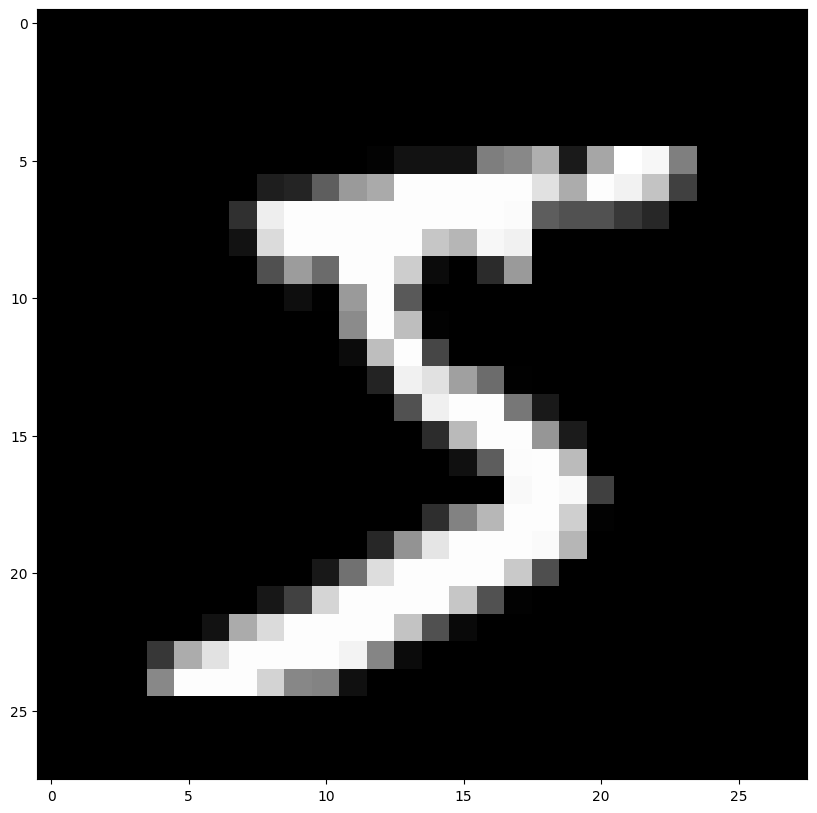

In [ ]:
num_labels = len(np.unique(y_train))  # Eğitim etiketlerindeki benzersiz sınıf sayısını hesaplar.

plt.figure(figsize=(10, 10))  # Yeni bir figura oluşturur ve boyutunu belirler.

plt.imshow(x_train[0], cmap='gray')  # İlk eğitim görüntüsünü gri tonlama olarak görselleştirir.

döngüyle resimleri yazdırdım

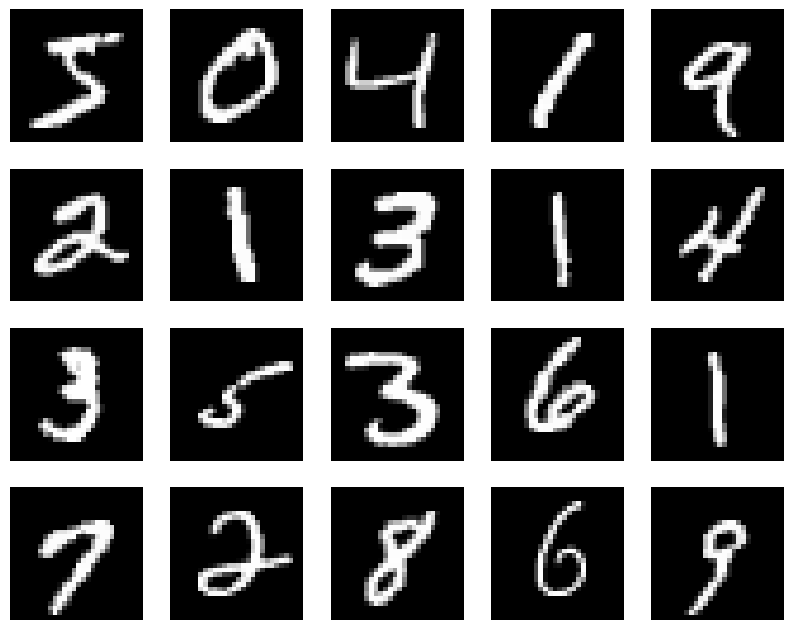

In [ ]:
plt.figure(figsize=(10, 10))  # Yeni bir figura oluşturur ve boyutunu belirler.

for n in range(20):  # 20 görüntü için döngü oluşturur.
    ax = plt.subplot(5, 5, n+1)  # 5x5 bir alt parça grafiği oluşturur ve mevcut görüntüyü bu grafiğe atar.

    plt.imshow(x_train[n], cmap='gray')  # Mevcut görüntüyü gri tonlamalı olarak görselleştirir.
    plt.axis('off')  # Eksenleri kapatır.

In [ ]:
def visualize_img(data):
    plt.figure(figsize=(10, 10))  # Yeni bir figura oluşturur ve boyutunu belirler.

    for n in range(20):  # 20 görüntü için döngü oluşturur.
        ax = plt.subplot(5, 5, n+1)  # 5x5 bir alt parça grafiği oluşturur ve mevcut görüntüyü bu grafiğe atar.

        plt.imshow(x_train[n], cmap='gray')  # Mevcut görüntüyü gri tonlamalı olarak görselleştirir.
        plt.axis('off')  # Eksenleri kapatır.

In [ ]:
x_train[2][14:20,10:20]

array([[ 49, 116, 144, 150, 241, 243, 234, 179, 241, 252],
       [254, 250, 240, 198, 143,  91,  28,   5, 233, 250],
       [ 98,  56,   0,   0,   0,   0,   0, 102, 254, 220],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254, 137],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254,  57],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254,  57]], dtype=uint8)

2 numaralı görselin 14->20 10->20 aralığındaki piksel renk değerlerini gösteriyor
rgb 0=siyah 
 255=beyaz

**Renkleri** **kodlarıyla** **bastırdık** 

In [ ]:
def pixel_visualize(img):
    fig = plt.figure(figsize=(10, 10))  # Yeni bir figura oluşturur ve boyutunu belirler.
    ax = fig.add_subplot(111)  # 1x1 alt parça grafiği oluşturur ve mevcut grafiği bu alt parça grafiğine ekler.

    ax.imshow(img, cmap='gray')  # Görüntüyü gri tonlamalı olarak görselleştirir.
    width, height = img.shape  # Görüntünün genişliğini ve yüksekliğini alır.

    threshold = img.max() / 2.5  # Eşik değerini hesaplar.

    for x in range(width):  # Genişlik boyunca bir döngü oluşturur.
        for y in range(height):  # Yükseklik boyunca bir döngü oluşturur.
            ax.annotate(str(round(img[x][y], 2)), xy=(y, x),
                        color='white' if img[x][y] < threshold else 'black')  # Her piksel için metin etiketi ekler.


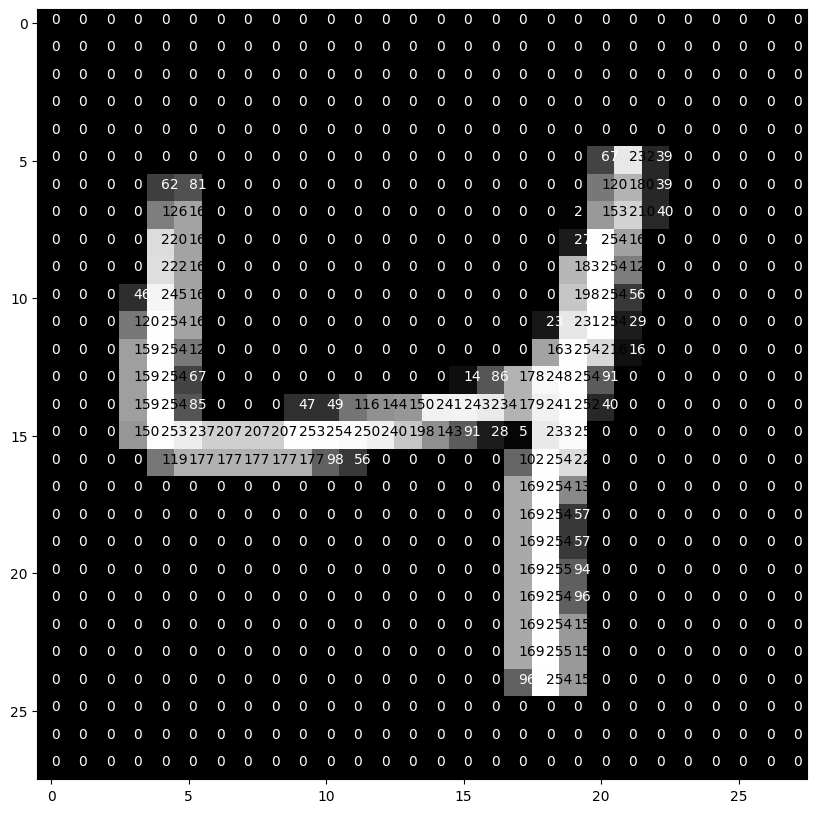

In [ ]:
pixel_visualize(x_train[2])

In [ ]:
y_train = to_categorical(y_train)  # Eğitim etiket verilerini kategorik forma dönüştürür.
y_test = to_categorical(y_test)  # Test etiket verilerini kategorik forma dönüştürür.


In [ ]:
y_train[0:5]  # İlk 5 eğitim etiketini görüntüler.

image_size = x_train.shape[1]  # Görüntü boyutunu alır.


In [ ]:
print(x_train.shape)  # Eğitim veri setinin boyutunu görüntüler.
print(x_test.shape)  # Test veri setinin boyutunu görüntüler.

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)  # Eğitim veri setinin boyutunu yeniden şekillendirir.
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)  # Test veri setinin boyutunu yeniden şekillendirir.
print(x_train.shape)  # Yeniden şekillendirilmiş eğitim veri setinin boyutunu görüntüler.
print(x_test.shape)  # Yeniden şekillendirilmiş test veri setinin boyutunu görüntüler.


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
x_train = x_train.astype('float32') / 255  # Eğitim veri setini 0-1 aralığında normalize eder.
x_test = x_test.astype('float32') / 255  # Test veri setini 0-1 aralığında normalize eder.
print(x_train.shape)  # Normalize edilmiş eğitim veri setinin boyutunu görüntüler.
print(x_test.shape)  # Normalize edilmiş test veri setinin boyutunu görüntüler.


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
model = tf.keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),  # Giriş katmanı olarak düzleştirme işlemi uygular.
    Dense(units=128, activation='relu', name='layer1'),  # 128 birimli gizli katman, aktivasyon fonksiyonu olarak ReLU kullanır.
    Dense(units=num_labels, activation='softmax', name='output_layer')  # Çıkış katmanı, sınıf sayısına uygun birimli softmax aktivasyonu kullanır.
])

model.compile(
    loss='categorical_crossentropy',  # Kayıp fonksiyonu olarak kategorik çapraz entropiyi kullanır.
    optimizer='adam',  # Optimizasyon algoritması olarak Adam optimizer'ı kullanır.
    metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"]  # Doğruluk, hassasiyet ve geri çağırma metriklerini kullanır.
)

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 layer1 (Dense)              (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(
    x_train,  # Eğitim veri seti
    y_train,  # Eğitim etiketleri
    epochs=5,  # Epoch sayısı
    batch_size=128,  # Mini-batch boyutu
    validation_data=(x_test, y_test)  # Doğrulama veri seti
)

Epoch 1/5
469/469 [==============================] - 11s 10ms/step - loss: 0.3551 - precision: 0.9466 - recall: 0.8491 - accuracy: 0.9017 - val_loss: 0.1953 - val_precision: 0.9578 - val_recall: 0.9312 - val_accuracy: 0.9437
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1616 - precision: 0.9641 - recall: 0.9437 - accuracy: 0.9532 - val_loss: 0.1336 - val_precision: 0.9680 - val_recall: 0.9544 - val_accuracy: 0.9604
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1148 - precision: 0.9733 - recall: 0.9602 - accuracy: 0.9665 - val_loss: 0.1174 - val_precision: 0.9713 - val_recall: 0.9606 - val_accuracy: 0.9648
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0887 - precision: 0.9793 - recall: 0.9693 - accuracy: 0.9745 - val_loss: 0.1020 - val_precision: 0.9736 - val_recall: 0.9644 - val_accuracy: 0.9683
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0722 - precision: 0.9830 - reca

epoch optimizasyon sayısı 5 defa çevir

In [ ]:
history=model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0602 - precision: 0.9856 - recall: 0.9794 - accuracy: 0.9825 - val_loss: 0.0834 - val_precision: 0.9785 - val_recall: 0.9720 - val_accuracy: 0.9745
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0500 - precision: 0.9879 - recall: 0.9831 - accuracy: 0.9856 - val_loss: 0.0847 - val_precision: 0.9779 - val_recall: 0.9711 - val_accuracy: 0.9748
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0420 - precision: 0.9903 - recall: 0.9865 - accuracy: 0.9881 - val_loss: 0.0804 - val_precision: 0.9777 - val_recall: 0.9730 - val_accuracy: 0.9751
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0364 - precision: 0.9918 - recall: 0.9884 - accuracy: 0.9901 - val_loss: 0.0765 - val_precision: 0.9783 - val_recall: 0.9741 - val_accuracy: 0.9756
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0304 - precision: 0.9930 - r

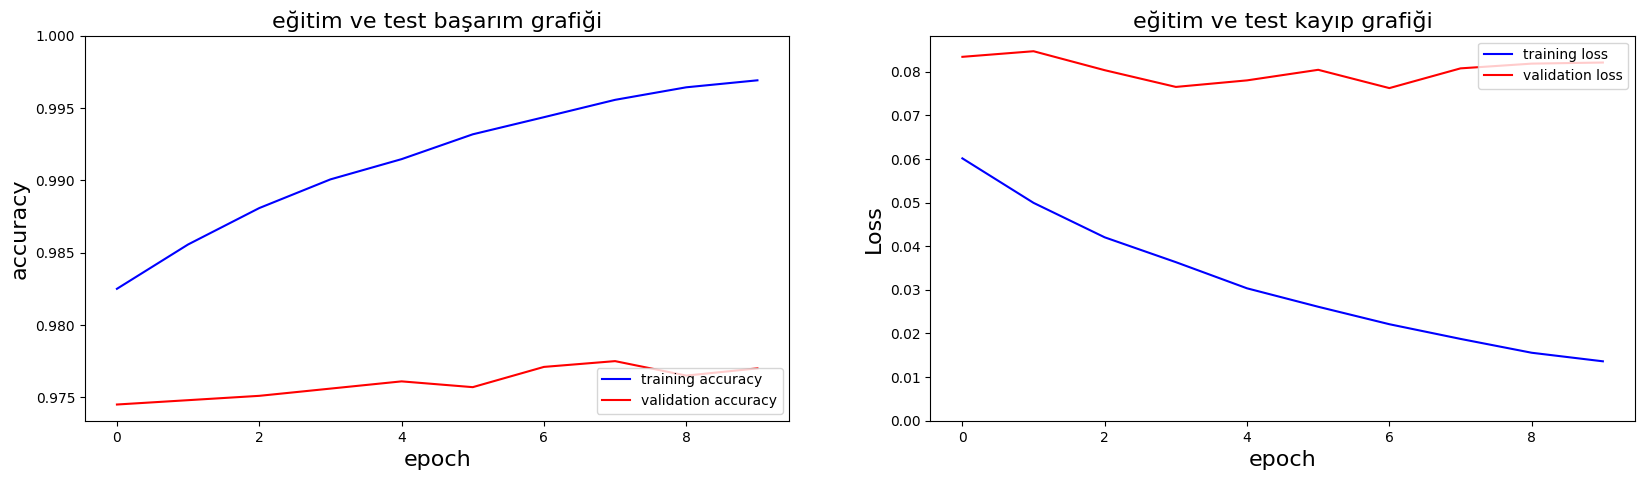

In [ ]:
plt.figure(figsize=(20, 5))  # Şekil boyutunu (20, 5) olarak belirler

plt.subplot(1, 2, 1)  # 1 satır, 2 sütunlu bir tabloya yerleştirme yapar ve ilk alt tabloya geçer
plt.plot(history.history['accuracy'], color='b', label='training accuracy')  # Eğitim başarımını mavi renkte çizdirir
plt.plot(history.history['val_accuracy'], color='r', label='validation accuracy')  # Doğrulama başarımını kırmızı renkte çizdirir
plt.legend(loc='lower right')  # Başarımların açıklamalarını sağ alt köşede gösterir
plt.xlabel('epoch', fontsize=16)  # X ekseninin etiketini belirler
plt.ylabel('accuracy', fontsize=16)  # Y ekseninin etiketini belirler
plt.ylim([min(plt.ylim()), 1])  # Y ekseninin değer aralığını belirler
plt.title('eğitim ve test başarım grafiği', fontsize=16)  # Tablonun başlığını belirler

plt.subplot(1, 2, 2)  # 1 satır, 2 sütunlu tabloda ikinci alt tabloya geçer
plt.plot(history.history['loss'], color='b', label='training loss')  # Eğitim kaybını mavi renkte çizdirir
plt.plot(history.history['val_loss'], color='r', label='validation loss')  # Doğrulama kaybını kırmızı renkte çizdirir
plt.legend(loc='upper right')  # Kayıpların açıklamalarını sağ üst köşede gösterir
plt.xlabel('epoch', fontsize=16)  # X ekseninin etiketini belirler
plt.ylabel('Loss', fontsize=16)  # Y ekseninin etiketini belirler
plt.ylim([0, max(plt.ylim())])  # Y ekseninin değer aralığını belirler
plt.title('eğitim ve test kayıp grafiği', fontsize=16)  # Tablonun başlığını belirler

plt.show()  # Tabloyu gösterir

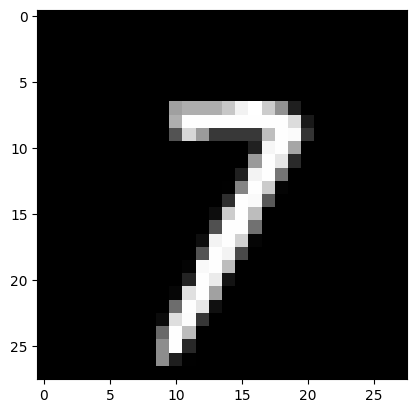

In [ ]:
model.save('mnist_model.h5')  # Eğitilmiş modeli 'mnist_model.h5' dosyasına kaydeder

import random  # random modülünü içe aktarır

random = random.randint(0, x_test.shape[0])  # 0 ile x_test'in şeklinin ilk boyutunun (örnek sayısı) arasında bir rasgele sayı seçer
test_image = x_test[random]  # Seçilen rasgele test görüntüsünü alır
y_test[random]  # Test etiketini alır (gerçek sınıfı gösterir)

plt.imshow(test_image.reshape(28, 28), cmap='gray')  # Test görüntüsünü 28x28 boyutunda ve grayscale olarak görselleştirir


In [ ]:
test_data = x_test[random].reshape(1, 28, 28, 1)  # Tek bir test örneğini yeniden şekillendirir
probability = model.predict(test_data)  # Modelin, test örneğinin sınıf olasılıklarını hesaplar
probability


1/1 [==============================] - 0s 19ms/step


array([[2.6198386e-08, 3.2787548e-06, 7.7901467e-07, 4.4761234e-04,
        3.4732332e-11, 3.8751985e-10, 1.1444833e-12, 9.9950910e-01,
        1.6028159e-07, 3.9005474e-05]], dtype=float32)

In [ ]:
predicted_classes = np.argmax(probability)  # En yüksek olasılığa sahip sınıfın indeksini alır


In [ ]:
predicted_classes

7